# Connecting to data storage

In [ ]:
# Load the Drive helper and mount the Drive
from google.colab import files
from google.colab import drive

# This will prompt for authorization.
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/dataset/"


02-14-2018.csv	02-20-2018.csv	02-23-2018.csv	03-02-2018.csv
02-15-2018.csv	02-21-2018.csv	02-28-2018.csv	readme.txt
02-16-2018.csv	02-22-2018.csv	03-01-2018.csv


# Clean dataset 

In [ ]:
#import some things we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#READ_FILE
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/02-14-2018.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [ ]:
#Clean data
df = df.dropna()
col_replace = []
for col in df:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    col_replace.append(col)

new_samples = df[col_replace].replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:

#spilit the dataset to two set
samples = df.drop('Label', axis=1)
labels = df['Label']



print(samples.info())
print(new_samples.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046298 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1046298 non-null  int64  
 1   Protocol           1046298 non-null  int64  
 2   Timestamp          1046298 non-null  object 
 3   Flow Duration      1046298 non-null  int64  
 4   Tot Fwd Pkts       1046298 non-null  int64  
 5   Tot Bwd Pkts       1046298 non-null  int64  
 6   TotLen Fwd Pkts    1046298 non-null  int64  
 7   TotLen Bwd Pkts    1046298 non-null  int64  
 8   Fwd Pkt Len Max    1046298 non-null  int64  
 9   Fwd Pkt Len Min    1046298 non-null  int64  
 10  Fwd Pkt Len Mean   1046298 non-null  float64
 11  Fwd Pkt Len Std    1046298 non-null  float64
 12  Bwd Pkt Len Max    1046298 non-null  int64  
 13  Bwd Pkt Len Min    1046298 non-null  int64  
 14  Bwd Pkt Len Mean   1046298 non-null  float64
 15  Bwd Pkt Len Std    1046298 non-n

# visualazie and reduce demension **dataset**

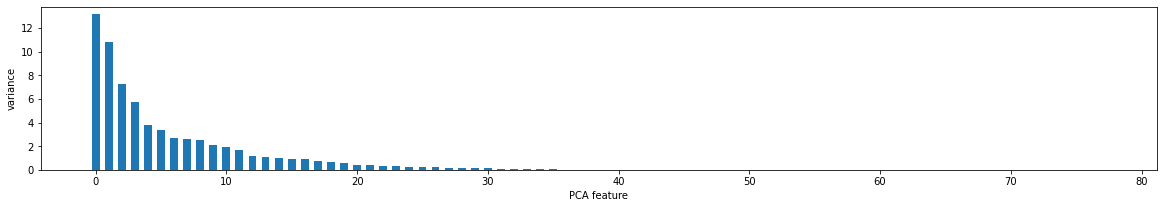

In [ ]:
#visualize and filtering data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#StandardScale the data
scale = StandardScaler()
scaled_samples =  scale.fit_transform(new_samples)

#visualiaze dataset
pca = PCA()
pca.fit(scaled_samples)


plt.bar(range(pca.n_components_), pca.explained_variance_, width = 0.6)
plt.ylabel('variance')
plt.xlabel('PCA feature')

plt.show()

In [ ]:
transform_samples = pca.transform(new_samples)
print(transform_samples)

[[ 2.13459353e+06 -2.47777847e+07  5.33684263e+05 ...  7.72514104e-09
  -1.17547594e-08  1.51561369e-06]
 [ 2.13458752e+06 -2.47777727e+07  5.33683469e+05 ...  7.72512365e-09
  -1.17547357e-08  1.51561709e-06]
 [ 2.13454284e+06 -2.47768166e+07  5.33666936e+05 ...  7.72492895e-09
  -1.17544183e-08  1.51565409e-06]
 ...
 [ 1.17763929e+05  1.75326505e+06 -1.12170939e+04 ...  8.60560268e-10
   7.43326543e-11  4.61188384e-05]
 [ 1.18459258e+05  1.70731253e+06 -1.19020627e+04 ...  8.77171735e-10
   7.45532087e-11  4.48915099e-05]
 [ 6.38228228e+05  5.77289303e+06 -5.07278529e+02 ...  7.76798812e-10
  -1.02121571e-09  1.03655946e-04]]
